# Zadanie 01 (b)

---
#### Napisz skrypt wyznaczający metodą siecznych miejsca zerowe funkcji 
$$f(x) = 3x^3 + 7x^2 -1$$
#### na przedziale $x \in (-3,2)$.
    
**Punktacja**
+ funkcja zawierająca implementacje metody siecznych **[2p.]**
+ wzynaczenie wszystkich miejsc zerowych **[1p.]**
+ wyznacznie "punktów pośrednich" dla jednego z miejsc zerowych **[1p.]**


## Metoda siecznych
---
![title](http://www.if.pw.edu.pl/~ryczkowski/download/MN/01/secant.png)

Metoda korzysta z podobieństwa trójkątów: $$\frac{f(x_1)-f(x_2)}{x_1-x_2} = \frac{f(x_2)-0}{x_2-x_3}$$ stąd $$x_3 = x_2 - \frac{f(x_2)(x_1-x_2)}{f(x_1)-f(x_2)}$$ Do wyznaczenia przybliżenia $k+1$ korzystamy z punktów $k-1$ i $k$ $$x_{k+1} = x_k - \frac{f(x_k)(x_{k-1}-x_k)}{f(x_{k-1})-f(x_k)}$$

## Wykonanie
---
Wczytanie bibliotek

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Deklaracja funkcji, dla której będą wyznczana miejsca zerowe (*wyrażenie lambda*)

In [2]:
f = lambda x: 3*np.power(x,3) + 7*np.power(x,2) - 1

Implementacja funkcji realizującej metodę bisekcji

In [5]:
def secant(func, a, b, err = 1e-10):
    
    xp = a # x_k-1
    xk = b # x_k
    
    while abs(xk - xp) > err:
        
        xp, xk = xk, (xk - (func(xk)*(xp-xk))/(func(xp)-func(xk)))
        
    return xk

Wyznaczenie jednego miejsca zerowego

In [8]:
a = -3
b =  2

z = secant(f, a, b)

Sprawdzenie wyniku

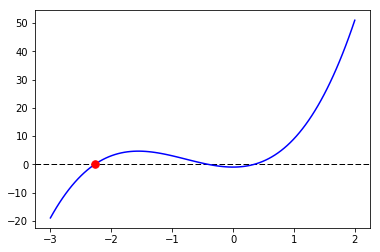

In [7]:
x = np.linspace(a, b, 100)

plt.axhline(0, linestyle='--', linewidth=1, color='black')
plt.plot(x, f(x), color='blue')
plt.plot(z, f(z), marker='.', markersize=15, color="red")
plt.show()

Wyznaczenie wszystkich miejsc zerowych na zadanym przedziale

In [9]:
steps = np.arange(a,b, 0.5)
print(steps)

[-3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5]


In [10]:
z = []
for i in range(len(steps)-1):
    if f(steps[i])*f(steps[i+1]) < 0:
        z.append(secant(f,steps[i],steps[i+1]))

z = np.array(z)

Sprawdzenie wyników

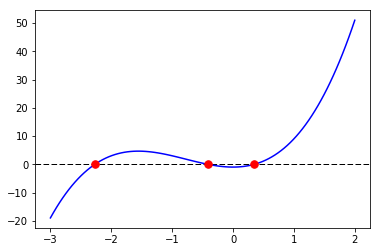

In [11]:
plt.axhline(0, linestyle='--', linewidth=1, color='black')
plt.plot(x, f(x), color='blue')
plt.plot(z, f(z), marker='.', linestyle=' ', markersize=15, color="red")
plt.show()

In [12]:
print(z)

[-2.26856285 -0.41707305  0.35230257]


Wyznaczenie pukntów pośrednich dla jednego z miejsc zerowych

In [13]:
def secant02(func, a, b, err = 1e-10):
    
    xp = a # x_k-1
    xk = b # x_k
    z = [a,b]
    
    while abs(xk - xp) > err:
        
        xp, xk = xk, (xk - (func(xk)*(xp-xk))/(func(xp)-func(xk)))
        z.append(xk)
    return z

In [14]:
z_steps = secant02(f, a, b)
z_steps = np.array(z_steps)
print(z_steps)

[-3.          2.         -1.64285714 -2.00320384 -2.66622389 -2.18128487
 -2.24251095 -2.27083807 -2.2685073  -2.26856274 -2.26856285 -2.26856285]


Wizualizacja wyniku

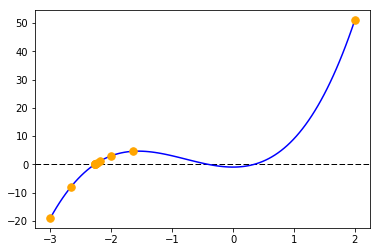

In [15]:
plt.axhline(0, linestyle='--', linewidth=1, color='black')
plt.plot(x, f(x), color='blue')
plt.plot(z_steps, f(z_steps), marker='.', linestyle=' ', markersize=15, color="orange")
plt.show()